In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/play-store-apps/googleplaystore.csv
/kaggle/input/play-store-apps/googleplaystore_user_reviews.csv


In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/play-store-apps/googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


It is because there is only one float columns that is Rating


In [7]:
# check the number of null values or say missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

As we can see there are 1473 missing / null values in Rating column

In [8]:
# check the data in Reviews columns
#as we can see while doing the df.info() we got to know that it is od object data type , lets convert it into intger data type
df['Reviews']=df['Reviews'].astype(int)

ValueError: invalid literal for int() with base 10: '3.0M'

while converting it to integer type we can see that it conatins one of its value is 3M that means 3 million reviews so we can conver it into number by removing M and multiplying or say replacing it by 3,000,000

In [9]:
#to get the respective record we can do this
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
df_copy=df.copy()

In [11]:
df_copy=df_copy.drop(df_copy.index[10472])

In [12]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [13]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
df=df.drop(df.index[10472])

In [15]:
# now we will try to change the type to int
df['Reviews']=df['Reviews'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


the reviews columns' type changes to int now lets check others cloumns

In [17]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [18]:
df['Size'].str.split("M").str[1]

0           
1           
2           
3           
4           
        ... 
10836       
10837       
10838       
10839    NaN
10840       
Name: Size, Length: 10840, dtype: object

In [19]:
df['Size']=df['Size'].str.replace("M","000K")

In [20]:
df['Size'].unique()

array(['19000K', '14000K', '8.7000K', '25000K', '2.8000K', '5.6000K',
       '29000K', '33000K', '3.1000K', '28000K', '12000K', '20000K',
       '21000K', '37000K', '2.7000K', '5.5000K', '17000K', '39000K',
       '31000K', '4.2000K', '7.0000K', '23000K', '6.0000K', '6.1000K',
       '4.6000K', '9.2000K', '5.2000K', '11000K', '24000K',
       'Varies with device', '9.4000K', '15000K', '10000K', '1.2000K',
       '26000K', '8.0000K', '7.9000K', '56000K', '57000K', '35000K',
       '54000K', '201k', '3.6000K', '5.7000K', '8.6000K', '2.4000K',
       '27000K', '2.5000K', '16000K', '3.4000K', '8.9000K', '3.9000K',
       '2.9000K', '38000K', '32000K', '5.4000K', '18000K', '1.1000K',
       '2.2000K', '4.5000K', '9.8000K', '52000K', '9.0000K', '6.7000K',
       '30000K', '2.6000K', '7.1000K', '3.7000K', '22000K', '7.4000K',
       '6.4000K', '3.2000K', '8.2000K', '9.9000K', '4.9000K', '9.5000K',
       '5.0000K', '5.9000K', '13000K', '73000K', '6.8000K', '3.5000K',
       '4.0000K', '2.3000

In [21]:
df['Size']=df['Size'].str.replace("k","")


In [22]:
df['Size']=df['Size'].replace('Varies with device',np.nan)


In [23]:
df['Size']=df['Size'].astype(float)

ValueError: could not convert string to float: '19000K'

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [25]:
df['Size']

0         19000K
1         14000K
2        8.7000K
3         25000K
4        2.8000K
          ...   
10836     53000K
10837    3.6000K
10838    9.5000K
10839        NaN
10840     19000K
Name: Size, Length: 10840, dtype: object

In [26]:
df=df.drop(df.index[10838])

In [27]:
df['Size']

0         19000K
1         14000K
2        8.7000K
3         25000K
4        2.8000K
          ...   
10835    9.6000K
10836     53000K
10837    3.6000K
10838    9.5000K
10840     19000K
Name: Size, Length: 10839, dtype: object

In [28]:
#Size is sucessfully converted into float let check other values

In [29]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000K,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000K,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [30]:
df["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

In [31]:
df["Type"]=df["Type"].map({'Free':0, 'Paid':1})

In [32]:
df["Type"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10835    0.0
10836    0.0
10837    0.0
10838    0.0
10840    0.0
Name: Type, Length: 10839, dtype: float64

In [33]:
df["Type"].unique()

array([ 0.,  1., nan])

In [34]:
df["Type"].isnull().sum()

1

In [35]:
df['Type'].mode()

0    0.0
Name: Type, dtype: float64

In [36]:
df['Type']=df["Type"].replace(np.nan,0)

In [37]:
df["Type"].unique()

array([0., 1.])

Till now we have corrected **Reviews**, **Size**,**Type** columns lets do for others

In [38]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [39]:
df["Installs"]=df["Installs"].str.replace("+","")

In [40]:
df["Installs"].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0'], dtype=object)

In [41]:
df["Installs"]=df["Installs"].str.replace(",","")

In [42]:
df["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [43]:
df["Installs"]=df["Installs"].astype(int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9365 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            9145 non-null   object 
 5   Installs        10839 non-null  int64  
 6   Type            10839 non-null  float64
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


Till now we have corrected **Reviews**, **Size**,**Type**,**Installs** columns lets do for others

In [45]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000K,10000,0.0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000K,500000,0.0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [46]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [47]:
df["Price"]=df["Price"].str.replace("$","")

In [48]:
df["Price"]=df["Price"].astype(float)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9365 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            9145 non-null   object 
 5   Installs        10839 non-null  int64  
 6   Type            10839 non-null  float64
 7   Price           10839 non-null  float64
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [50]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [51]:
df["Content Rating"].value_counts()

Content Rating
Everyone           8714
Teen               1208
Mature 17+          498
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
encoder=OneHotEncoder()
encoder.fit_transform(df[['Content Rating']]).toarray()

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [54]:
df_Content_rating=pd.DataFrame(encoder.fit_transform(df[['Content Rating']]).toarray(),columns=encoder.get_feature_names_out())

In [55]:
df_Content_rating

,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
10834,0.0,1.0,0.0,0.0,0.0,0.0
10835,0.0,1.0,0.0,0.0,0.0,0.0
10836,0.0,1.0,0.0,0.0,0.0,0.0
10837,0.0,1.0,0.0,0.0,0.0,0.0


In [56]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000K,10000,0.0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000K,500000,0.0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7000K,5000000,0.0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000K,50000000,0.0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8000K,100000,0.0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0,9.6000K,10,0.0,0.0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000K,5000,0.0,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6000K,100,0.0,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5000K,1000,0.0,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


In [57]:
df_Content_rating.shape

(10839, 6)

In [58]:
df.shape

(10839, 13)

In [59]:
df_merged = pd.concat([df, df_Content_rating], axis=1)

In [60]:
df_merged = df_merged.drop('Content Rating', axis=1)

In [61]:
df_merged

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000K,10000.0,0.0,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0,1.0,0.0,0.0,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000K,500000.0,0.0,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,1.0,0.0,0.0,0.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7000K,5000000.0,0.0,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0,1.0,0.0,0.0,0.0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000K,50000000.0,0.0,0.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0,0.0,0.0,0.0,1.0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8000K,100000.0,0.0,0.0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000K,5000.0,0.0,0.0,Education,"July 25, 2017",1.48,4.1 and up,0.0,1.0,0.0,0.0,0.0,0.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6000K,100.0,0.0,0.0,Education,"July 6, 2018",1.0,4.1 and up,0.0,1.0,0.0,0.0,0.0,0.0
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5000K,1000.0,0.0,0.0,Medical,"January 20, 2017",1.0,2.2 and up,0.0,1.0,0.0,0.0,0.0,0.0
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307.0,19000K,10000000.0,0.0,0.0,Lifestyle,"July 25, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10472
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   App                             10839 non-null  object 
 1   Category                        10839 non-null  object 
 2   Rating                          9365 non-null   float64
 3   Reviews                         10839 non-null  float64
 4   Size                            9145 non-null   object 
 5   Installs                        10839 non-null  float64
 6   Type                            10839 non-null  float64
 7   Price                           10839 non-null  float64
 8   Genres                          10839 non-null  object 
 9   Last Updated                    10839 non-null  object 
 10  Current Ver                     10831 non-null  object 
 11  Android Ver                     10837 non-null  object 
 12  Content Rating_Adults only 18+  10839

Till now we have corrected **Reviews**, **Size**,**Type**,**Installs**,**Content Rating**,**Price** columns lets do for others

In [63]:
df_merged.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000K,10000.0,0.0,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0,1.0,0.0,0.0,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000K,500000.0,0.0,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,1.0,0.0,0.0,0.0,0.0


In [64]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [66]:
## Handlling Last update feature
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [67]:
df_copy=df_merged

In [68]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

In [69]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10472
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   App                             10839 non-null  object        
 1   Category                        10839 non-null  object        
 2   Rating                          9365 non-null   float64       
 3   Reviews                         10839 non-null  float64       
 4   Size                            9145 non-null   object        
 5   Installs                        10839 non-null  float64       
 6   Type                            10839 non-null  float64       
 7   Price                           10839 non-null  float64       
 8   Genres                          10839 non-null  object        
 9   Last Updated                    10839 non-null  datetime64[ns]
 10  Current Ver                     10831 non-null  object        
 11  Android

In [70]:
df_merged=df_copy

In [71]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10472
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   App                             10839 non-null  object        
 1   Category                        10839 non-null  object        
 2   Rating                          9365 non-null   float64       
 3   Reviews                         10839 non-null  float64       
 4   Size                            9145 non-null   object        
 5   Installs                        10839 non-null  float64       
 6   Type                            10839 non-null  float64       
 7   Price                           10839 non-null  float64       
 8   Genres                          10839 non-null  object        
 9   Last Updated                    10839 non-null  datetime64[ns]
 10  Current Ver                     10831 non-null  object        
 11  Android

In [ ]:
#even the last upadated column is also converted to date and time formate

In [72]:
df_merged.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,...,Android Ver,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000K,10000.0,0.0,0.0,Art & Design,2018-01-07,...,4.0.3 and up,0.0,1.0,0.0,0.0,0.0,0.0,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000K,500000.0,0.0,0.0,Art & Design;Pretend Play,2018-01-15,...,4.0.3 and up,0.0,1.0,0.0,0.0,0.0,0.0,15.0,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7000K,5000000.0,0.0,0.0,Art & Design,2018-08-01,...,4.0.3 and up,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000K,50000000.0,0.0,0.0,Art & Design,2018-06-08,...,4.2 and up,0.0,0.0,0.0,0.0,1.0,0.0,8.0,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8000K,100000.0,0.0,0.0,Art & Design;Creativity,2018-06-20,...,4.4 and up,0.0,1.0,0.0,0.0,0.0,0.0,20.0,6.0,2018.0


In [76]:

##as we can see size is still an object type lets convert it to int or float

df_merged['Size']=df_merged['Size'].str.replace("K","")

In [81]:
df_merged['Size'].isnull().su

1695

as we can see there is significant no. of null values we can drop all of them we can fill the null values using mode or median for this median is the better option 

In [84]:
df_merged['Size']=df_merged['Size'].astype(float)

In [87]:
df_merged['Size'].fillna(df_merged['Size'].median(),axis=0,inplace=True)

/tmp/ipykernel_36/445612946.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['Size'].fillna(df_merged['Size'].median(),axis=0,inplace=True)


In [88]:
df_merged['Size'].info()

<class 'pandas.core.series.Series'>
Index: 10840 entries, 0 to 10472
Series name: Size
Non-Null Count  Dtype  
--------------  -----  
10840 non-null  float64
dtypes: float64(1)
memory usage: 427.4 KB


In [89]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10472
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   App                             10839 non-null  object        
 1   Category                        10839 non-null  object        
 2   Rating                          9365 non-null   float64       
 3   Reviews                         10839 non-null  float64       
 4   Size                            10840 non-null  float64       
 5   Installs                        10839 non-null  float64       
 6   Type                            10839 non-null  float64       
 7   Price                           10839 non-null  float64       
 8   Genres                          10839 non-null  object        
 9   Last Updated                    10839 non-null  datetime64[ns]
 10  Current Ver                     10831 non-null  object        
 11  Android

In [ ]:
#now we have succesfully converted size into float but still need to replace the null values

## EDA

In [90]:
#lets check for the duplicate values

df.duplicated("App")

0        False
1        False
2        False
3        False
4        False
         ...  
10835    False
10836    False
10837    False
10838    False
10840    False
Length: 10839, dtype: bool

In [92]:
# to see the shape of its
df[df.duplicated("App")].shape

(1181, 13)

In [95]:
#as we can see there is significant no. of duplicted values so need to drop them

df_merged.drop_duplicates(subset=['App'],keep='first', inplace=True)

In [96]:
df_merged.shape
#duplictaed shapes are droped

(9659, 21)

In [114]:
numeric_features=[feature for feature in df_merged.columns if df_merged[feature].dtype!="O"]
categorical_features=[feature for feature in df_merged.columns if df_merged[feature].dtype=="O"]

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 16 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Last Updated', 'Content Rating_Adults only 18+', 'Content Rating_Everyone', 'Content Rating_Everyone 10+', 'Content Rating_Mature 17+', 'Content Rating_Teen', 'Content Rating_Unrated', 'Day', 'Month', 'Year']

We have 5 categorical features : ['App', 'Category', 'Genres', 'Current Ver', 'Android Ver']


### Feature Information

1. **App Name:**  
   - The name of the application.
   
2. **Category:**  
   - The category under which the app is classified (e.g., Games, Education).
   
3. **Rating:**  
   - The app's overall user rating on the Play Store.
   
4. **Reviews:**  
   - The total number of reviews submitted by users for the app.
   
5. **Size:**  
   - The file size of the app.
   
6. **Installs:**  
   - The number of times the app has been installed by users.
   
7. **Type:**  
   - Whether the app is free or paid.
   
8. **Price:**  
   - The price of the app (set to 0 if the app is free).
   
9. **Content Rating:**  
   - The appropriate audience for the app (e.g., Everyone, Teen).
   
10. **Genres:**  
    - The genre or subcategories the app belongs to (e.g., Action, Puzzle).
    
11. **Last Updated:**  
    - The date when the app was last updated on the Play Store.
    
12. **Current Version:**  
    - The current version of the app.
    
13. **Android Version:**  
    - The minimum Android version required to run the app.

In [115]:
df_copy=df_merged

In [116]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10472
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   App                             9658 non-null   object        
 1   Category                        9658 non-null   object        
 2   Rating                          8195 non-null   float64       
 3   Reviews                         9658 non-null   float64       
 4   Size                            9659 non-null   float64       
 5   Installs                        9658 non-null   float64       
 6   Type                            9658 non-null   float64       
 7   Price                           9658 non-null   float64       
 8   Genres                          9658 non-null   object        
 9   Last Updated                    9658 non-null   datetime64[ns]
 10  Current Ver                     9650 non-null   object        
 11  Android 

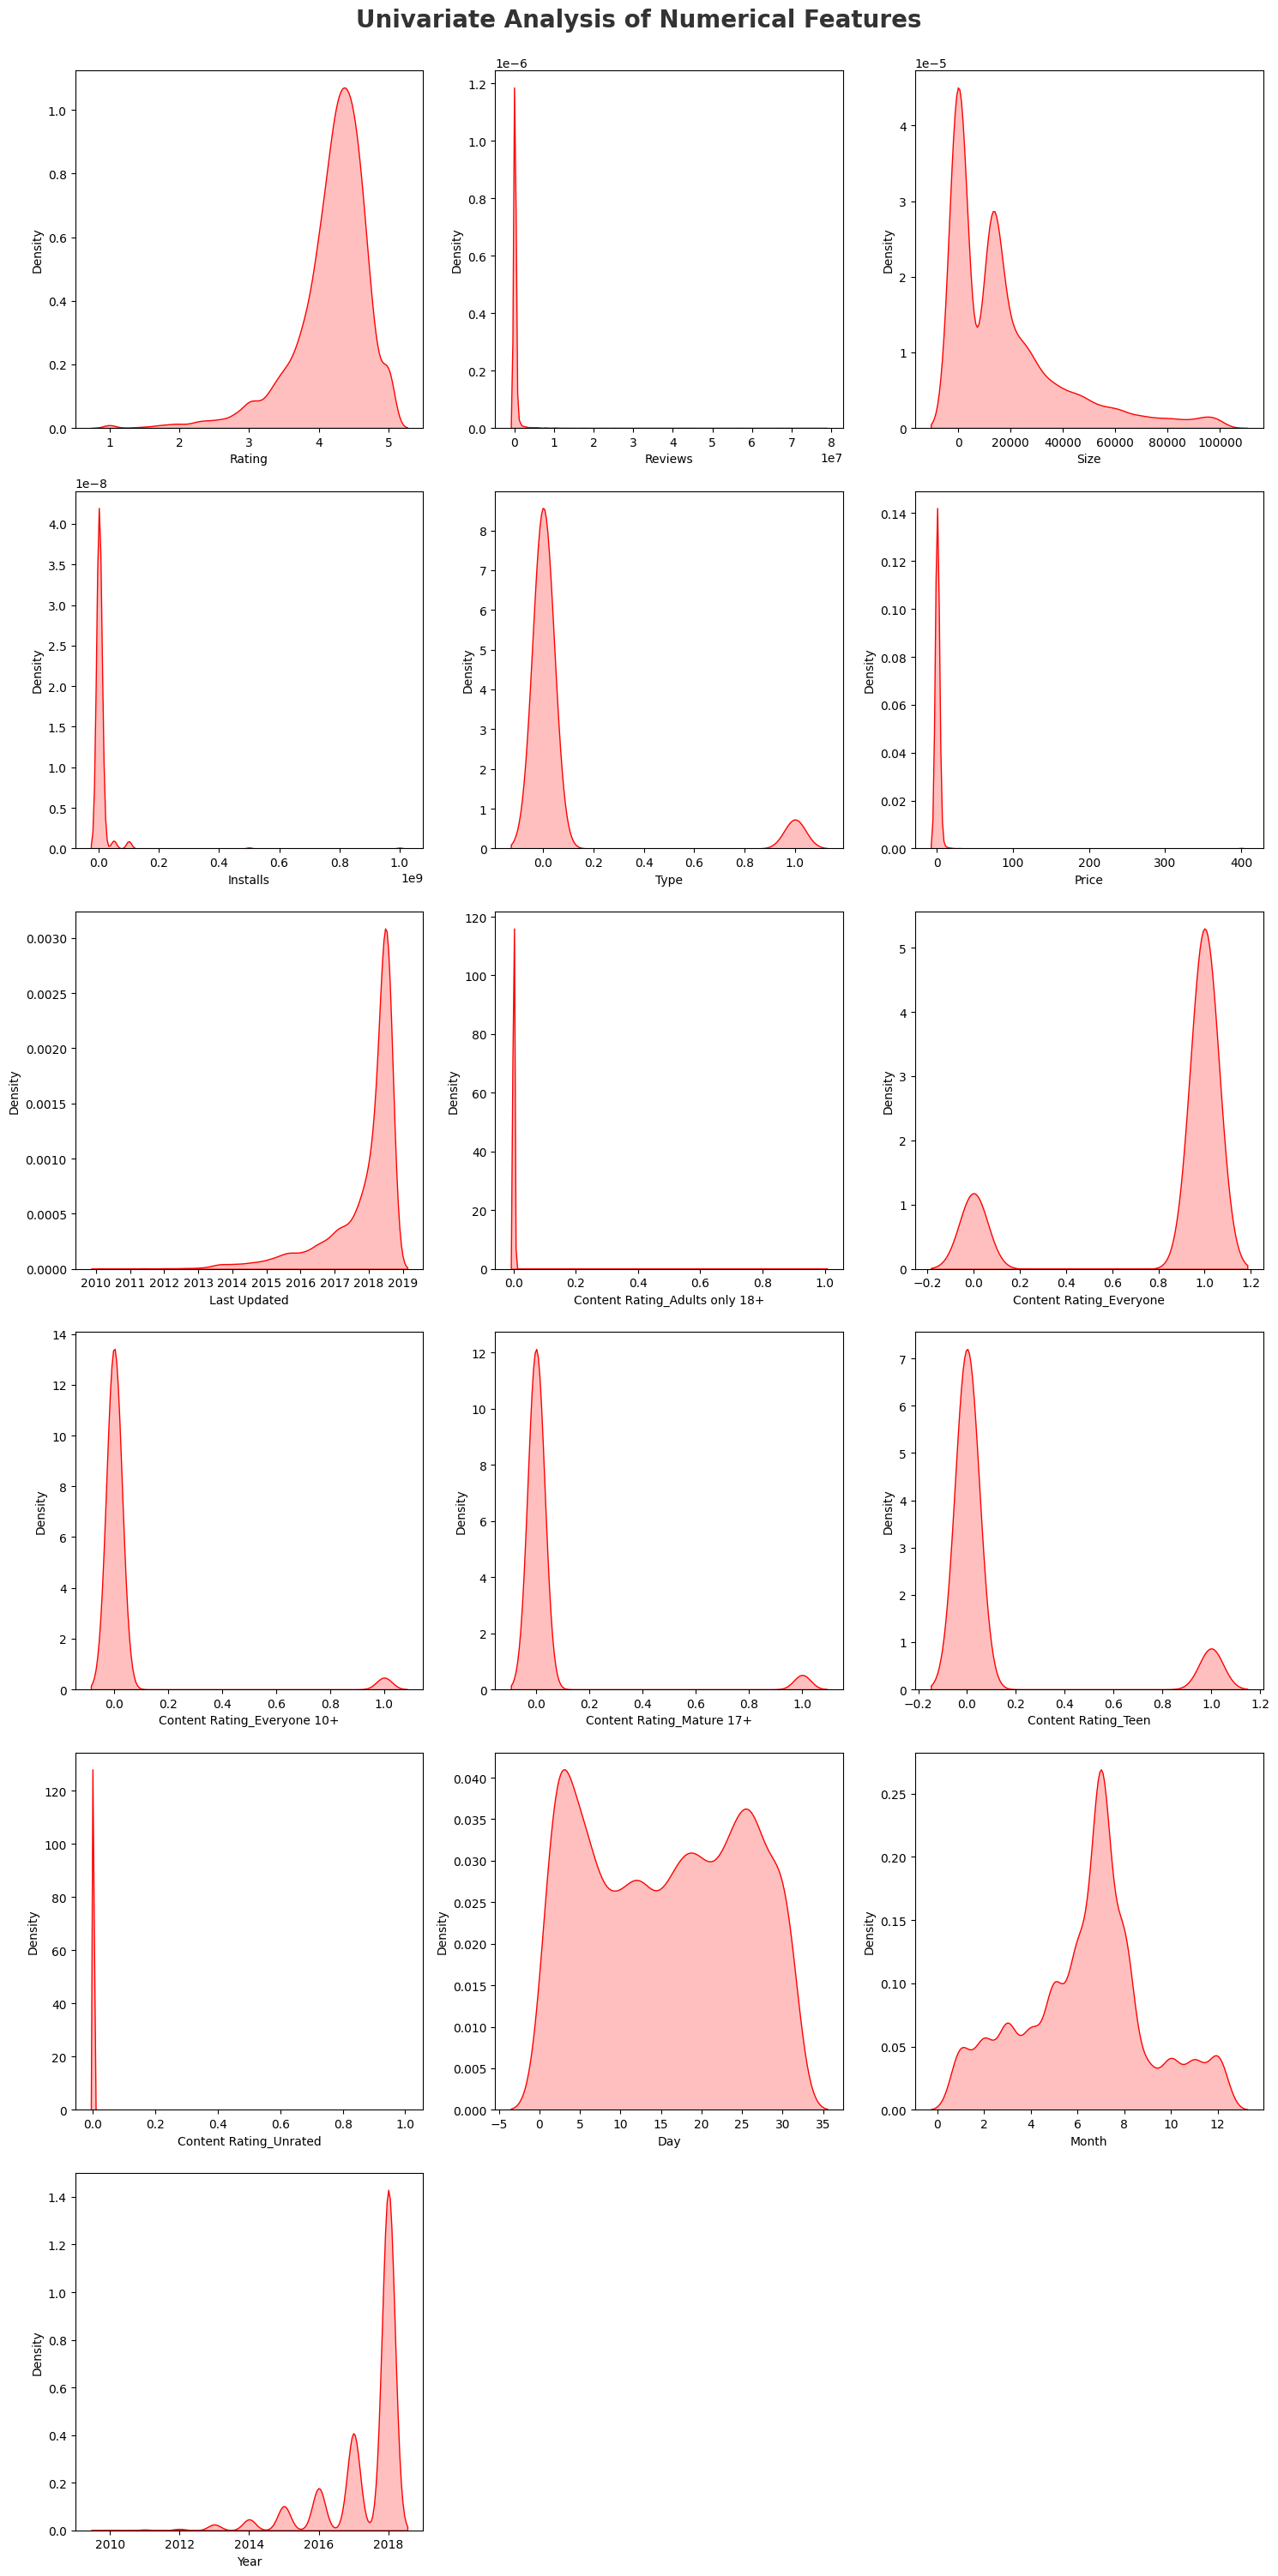

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

# Convert inf values to NaN
df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)

#There are 21 numeric features
numeric_features = df_copy.select_dtypes(include=['float64', 'int64', 'datetime']).columns[:21]

# Set the number of rows and columns to accommodate 21 features
n_cols = 3
n_rows = math.ceil(len(numeric_features) / n_cols)

plt.figure(figsize=(15, n_rows * 5))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(numeric_features)):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(x=df_copy[numeric_features[i]], fill=True, color='r')  # Use fill=True
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


### Observation 
As we can see above Year,Last Updated,Rating,Content Rating_Everyone Content Rating_Matureare left skewed and Content Rating_Unrated,Content Rating Mature 17+,Content Rating teen,Content Rating Only Adults 18+,Price, Installs and Reviews are right skewed 

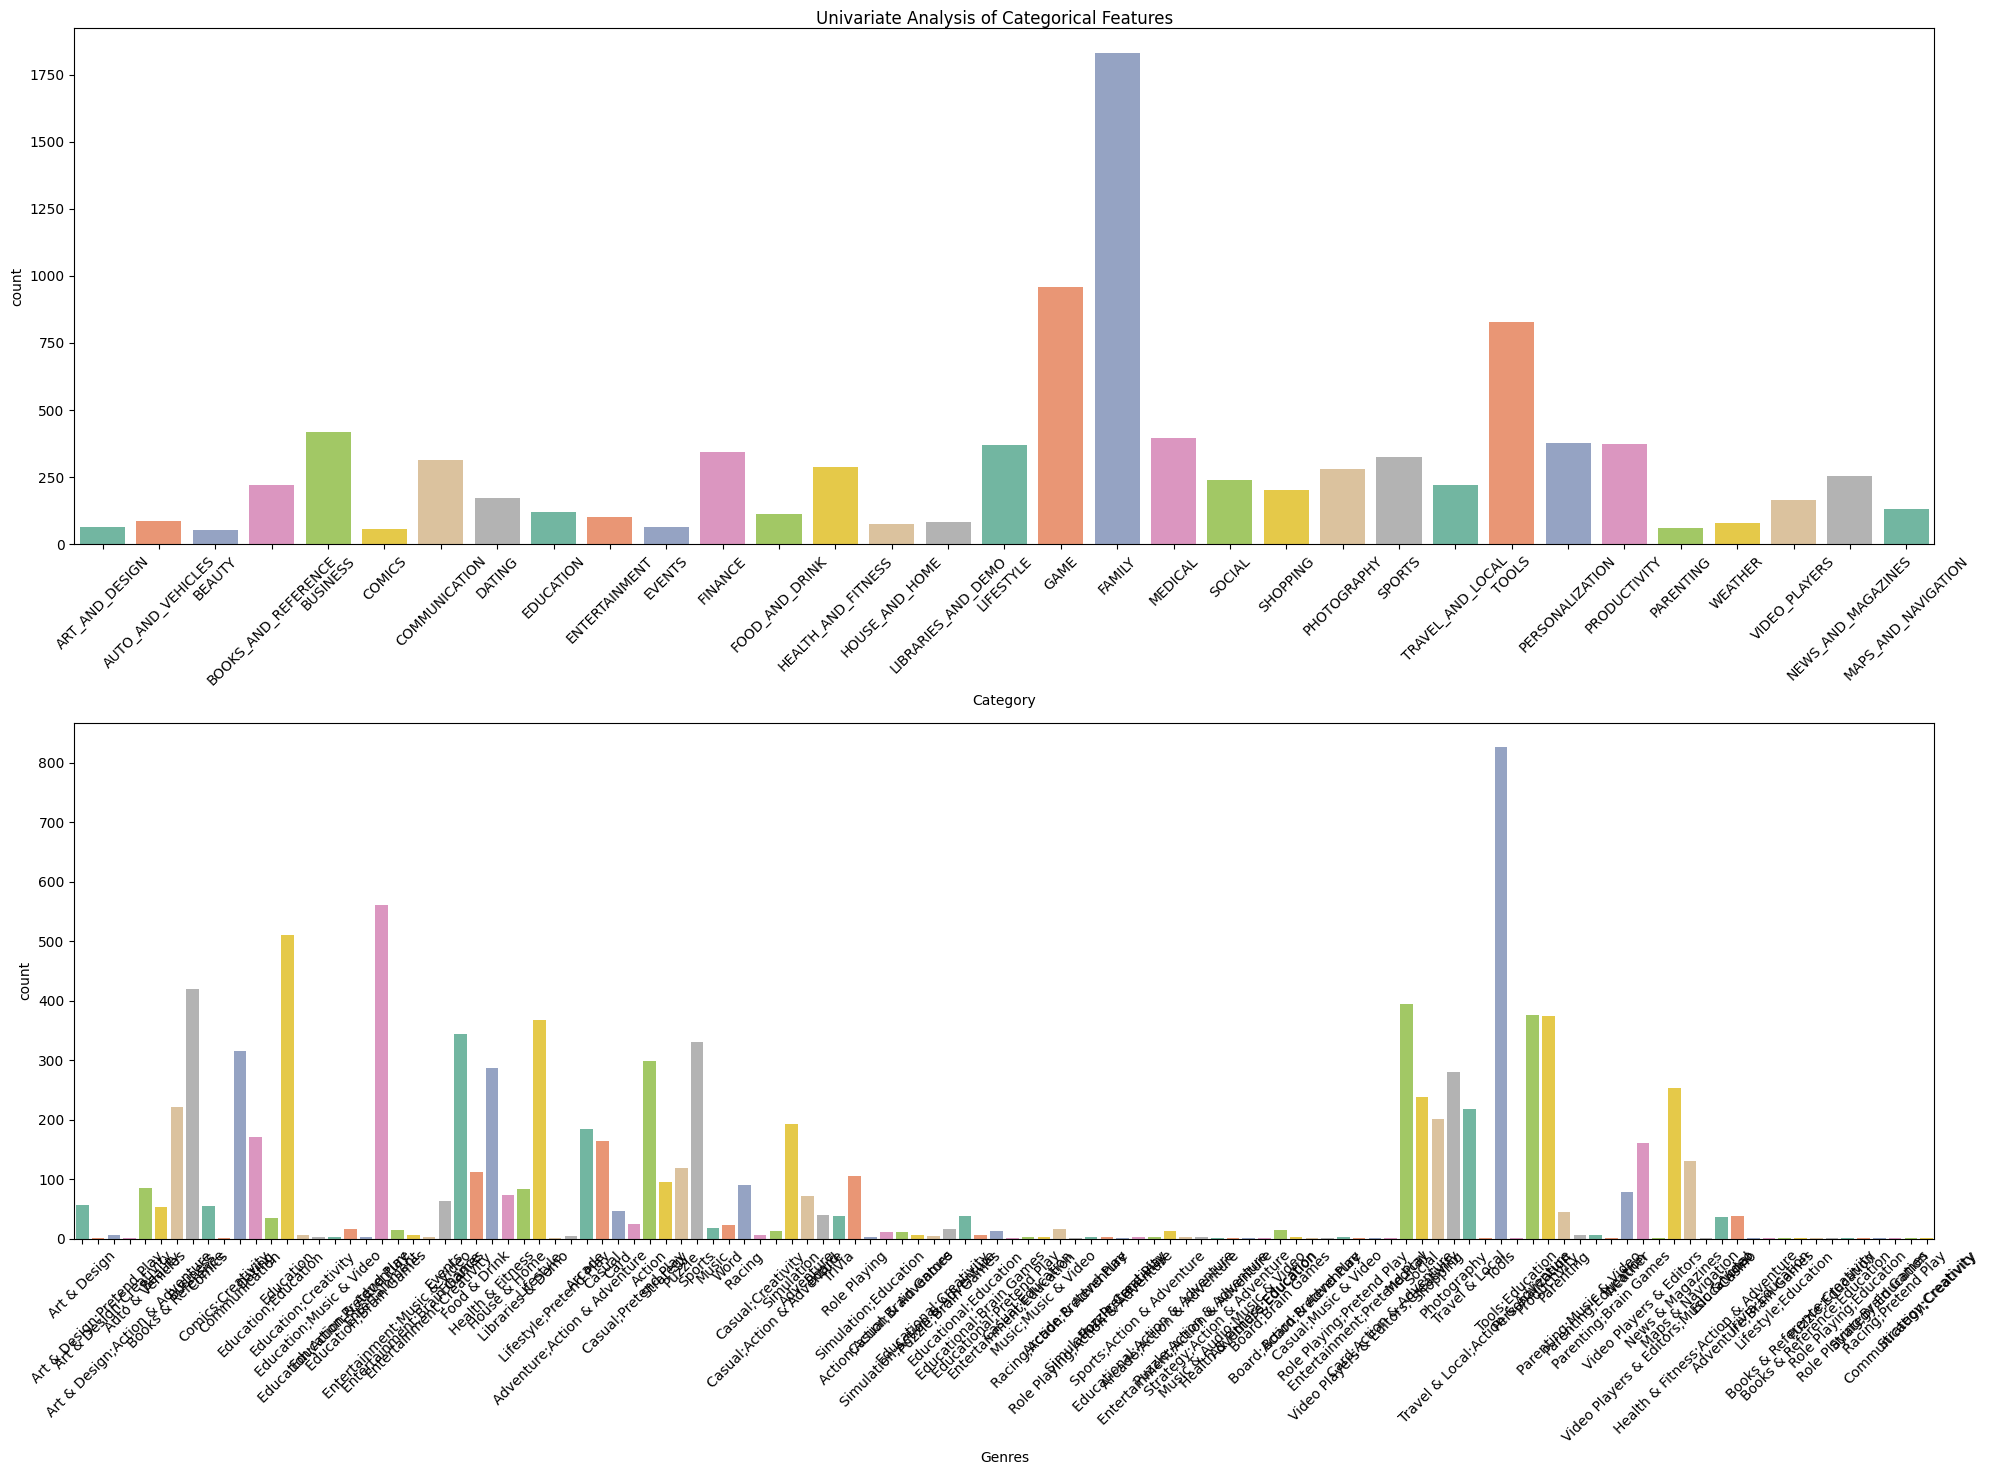

In [128]:
plt.figure(figsize=(20, 15))
plt.suptitle("Univariate Analysis of Categorical Features")
category_features=['Category', 'Genres']
for i in range(len(category_features)):
    plt.subplot(2,1,i+1)
    sns.countplot(x=df_copy[category_features[i]],palette="Set2")
    plt.xlabel(category_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [129]:
#To display the most % of category
df_copy['Category'].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

<Axes: ylabel='count'>

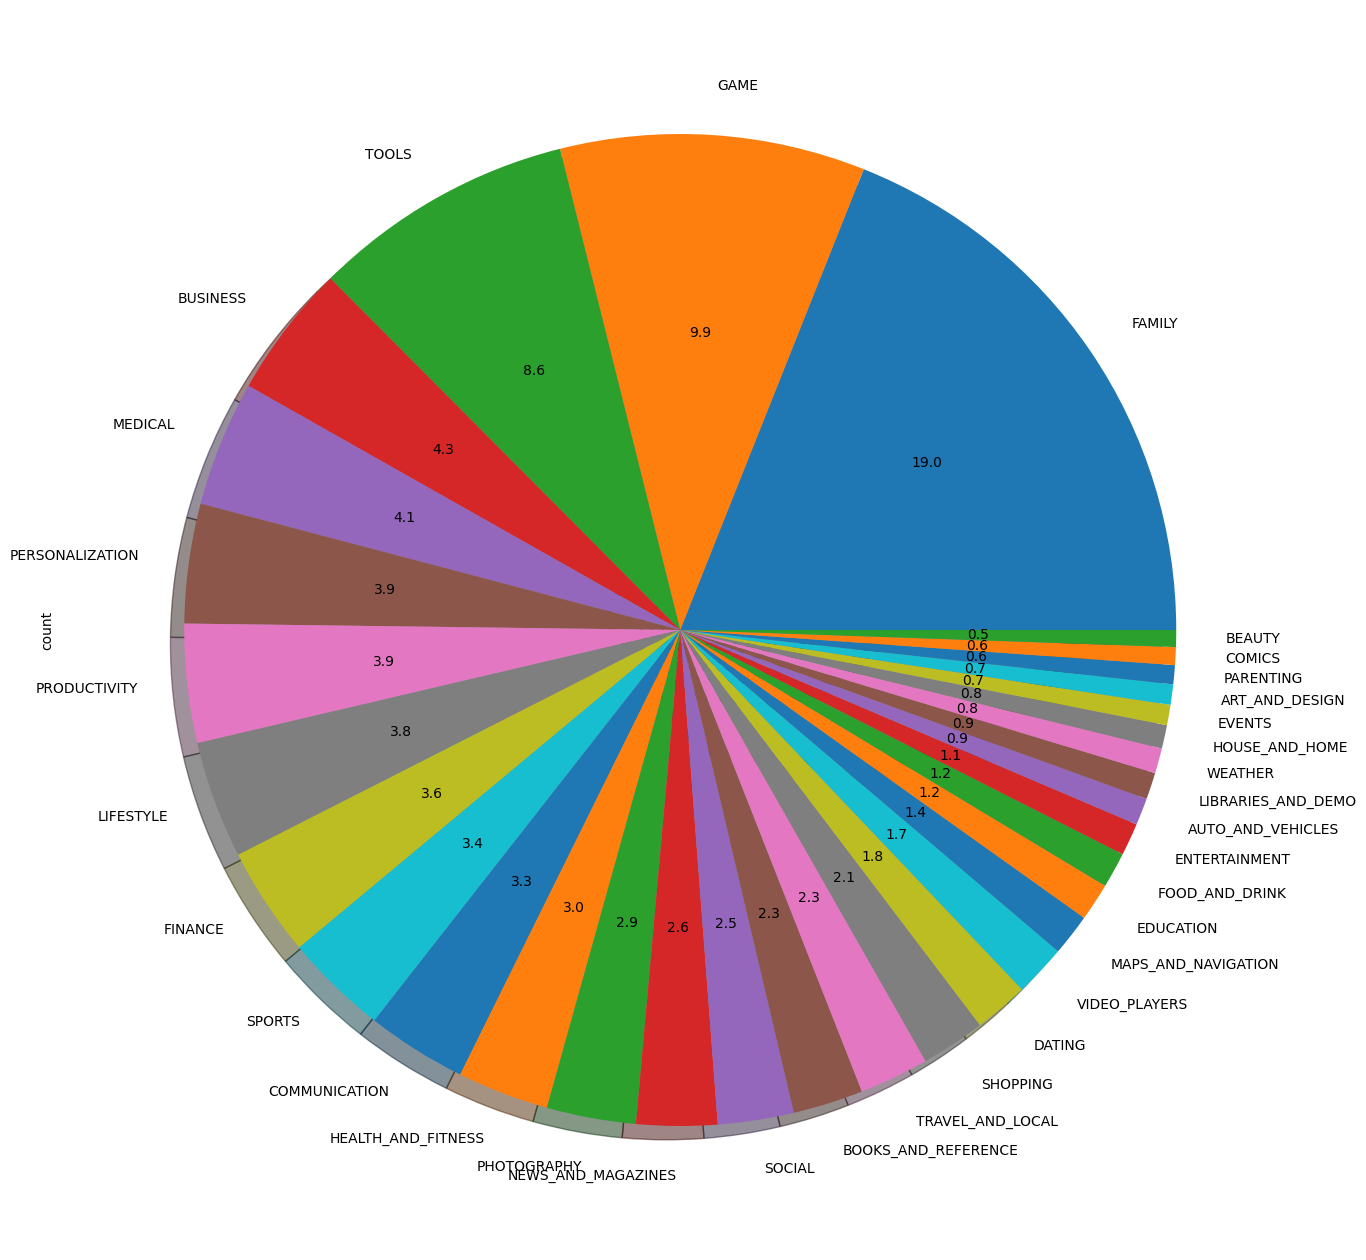

In [155]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],autopct='%1.1f',figsize=(16,18),shadow=True)


In [156]:
## Top 10 App Categories
category = pd.DataFrame(df_copy['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

In [157]:
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


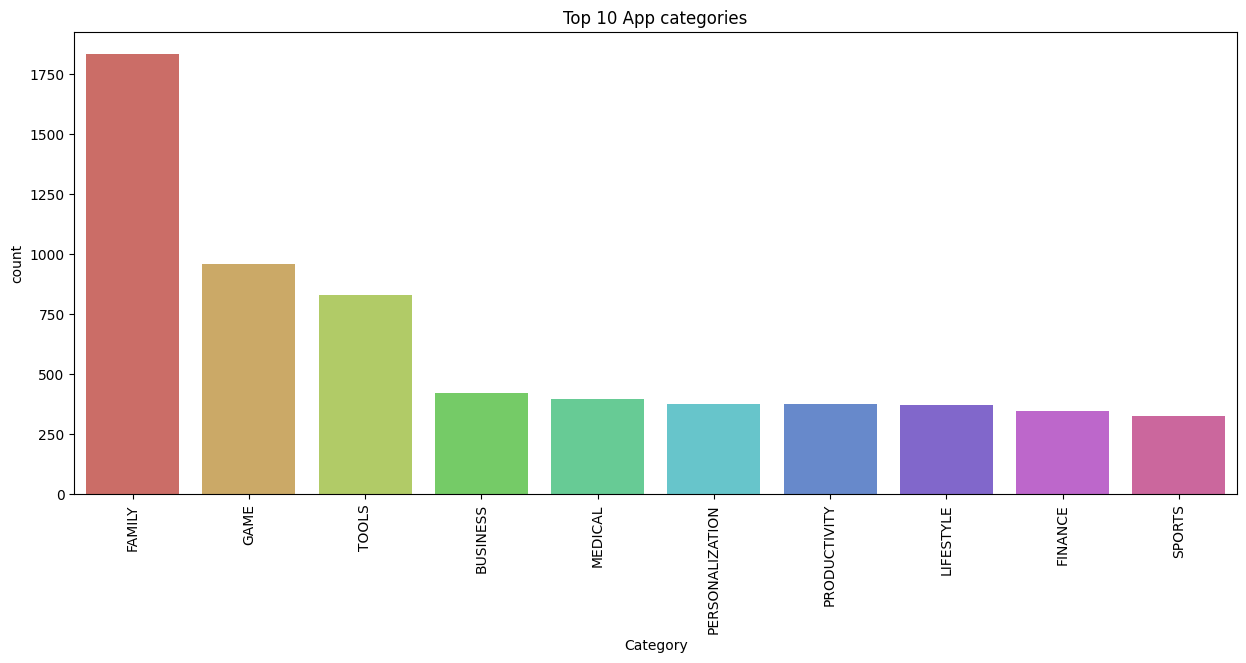

In [159]:
## top 10 app
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()